In [1]:
import sys
assert sys.version_info > (3, 5)

import sklearn 
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras 
assert tf.__version__ >= "2.0"

import numpy as np 
import os

np.random.seed(42)

import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test/ 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

model = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax") 
])

In [3]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) 
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 
    y_B = (y[y_5_or_6] == 6).astype(np.float32) 
    
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

In [5]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]
#2017250045 정태환
print("\nX_train_A.shape: ", X_train_A.shape)
print("\nX_train_B.shape: ", X_train_B.shape)
print("\ny_train_A[:30]: ", y_train_A[:30])
print("\ny_train_B[:30]:", y_train_B[:30])


X_train_A.shape:  (43986, 28, 28)

X_train_B.shape:  (200, 28, 28)

y_train_A[:30]:  [4 0 5 7 7 7 4 4 3 4 0 1 6 3 4 3 2 6 5 3 4 5 1 3 4 2 0 6 7 1]

y_train_B[:30]: [1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1.]


In [11]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss= "sparse_categorical_crossentropy",
    optimizer= keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20, 
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.h5")
#2017250045 정태환

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5701 - accuracy: 0.8172 - val_loss: 0.3740 - val_accuracy: 0.8772
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3507 - accuracy: 0.8792 - val_loss: 0.3171 - val_accuracy: 0.8939
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8902 - val_loss: 0.3010 - val_accuracy: 0.8976
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8975 - val_loss: 0.2809 - val_accuracy: 0.9108
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9026 - val_loss: 0.2753 - val_accuracy: 0.9106
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9061 - val_loss: 0.2636 - val_accuracy: 0.9160
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.9099 - val_loss: 0.2602 - val_accuracy:

In [12]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss= "binary_crossentropy",
    optimizer= keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20, 
                      validation_data=(X_valid_B, y_valid_B))
#2017250045 정태환
model.summary()


Epoch 1/20
7/7 [==============================] - 1s 31ms/step - loss: 0.4615 - accuracy: 0.7700 - val_loss: 0.4093 - val_accuracy: 0.8164
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3297 - accuracy: 0.9000 - val_loss: 0.3179 - val_accuracy: 0.9128
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2546 - accuracy: 0.9600 - val_loss: 0.2628 - val_accuracy: 0.9412
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2076 - accuracy: 0.9700 - val_loss: 0.2226 - val_accuracy: 0.9564
Epoch 5/20
7/7 [==============================] - 0s 12ms/step - loss: 0.1731 - accuracy: 0.9900 - val_loss: 0.1957 - val_accuracy: 0.9594
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1492 - accuracy: 0.9900 - val_loss: 0.1763 - val_accuracy: 0.9635
Epoch 7/20
7/7 [==============================] - 0s 12ms/step - loss: 0.1315 - accuracy: 0.9900 - val_loss: 0.1619 - val_accuracy: 0.9675
Epoch 8/20
7/7 [===========

In [14]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) 
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A) 
model_A_clone.set_weights(model_A.get_weights())

for layer in model_B_on_A.layers[:-1]: 
    layer.trainable = False
#2017250045 정태환
model_B_on_A.compile(loss="binary_crossentropy", 
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 31ms/step - loss: 1.9690 - accuracy: 0.0900 - val_loss: 1.7444 - val_accuracy: 0.1511
Epoch 2/4
7/7 [==============================] - 0s 10ms/step - loss: 1.8124 - accuracy: 0.1300 - val_loss: 1.6101 - val_accuracy: 0.1866
Epoch 3/4
7/7 [==============================] - 0s 10ms/step - loss: 1.6690 - accuracy: 0.1550 - val_loss: 1.4764 - val_accuracy: 0.2211
Epoch 4/4
7/7 [==============================] - 0s 10ms/step - loss: 1.5272 - accuracy: 0.1850 - val_loss: 1.3607 - val_accuracy: 0.2606


In [15]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True 
#2017250045 정태환    
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"]) 
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 33ms/step - loss: 1.1837 - accuracy: 0.3400 - val_loss: 0.8121 - val_accuracy: 0.5548
Epoch 2/16
7/7 [==============================] - 0s 11ms/step - loss: 0.7177 - accuracy: 0.6300 - val_loss: 0.5277 - val_accuracy: 0.7404
Epoch 3/16
7/7 [==============================] - 0s 11ms/step - loss: 0.4665 - accuracy: 0.7800 - val_loss: 0.3827 - val_accuracy: 0.8489
Epoch 4/16
7/7 [==============================] - 0s 10ms/step - loss: 0.3359 - accuracy: 0.8650 - val_loss: 0.3016 - val_accuracy: 0.9057
Epoch 5/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2616 - accuracy: 0.9100 - val_loss: 0.2496 - val_accuracy: 0.9320
Epoch 6/16
7/7 [==============================] - 0s 11ms/step - loss: 0.2129 - accuracy: 0.9550 - val_loss: 0.2121 - val_accuracy: 0.9503
Epoch 7/16
7/7 [==============================] - 0s 13ms/step - loss: 0.1780 - accuracy: 0.9750 - val_loss: 0.1851 - val_accuracy: 0.9625
Epoch 8/16
7/7 [===========

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, 
                      validation_data=(X_valid, y_valid))
model.summary()

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5411 - accuracy: 0.8127 - val_loss: 0.3871 - val_accuracy: 0.8642
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3932 - accuracy: 0.8601 - val_loss: 0.3518 - val_accuracy: 0.8756
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.8723 - val_loss: 0.3274 - val_accuracy: 0.8874
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3265 - accuracy: 0.8820 - val_loss: 0.3230 - val_accuracy: 0.8890
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.8879 - val_loss: 0.3236 - val_accuracy: 0.8830
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2923 - accuracy: 0.8937 - val_loss: 0.3102 - val_accuracy: 0.8880
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8999 - val_loss: 0.3104 - val_accuracy:

In [22]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.summary()

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2331 - accuracy: 0.9140 - val_loss: 0.3043 - val_accuracy: 0.8906
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2228 - accuracy: 0.9175 - val_loss: 0.3032 - val_accuracy: 0.8906
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2165 - accuracy: 0.9202 - val_loss: 0.3053 - val_accuracy: 0.8920
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2090 - accuracy: 0.9229 - val_loss: 0.3076 - val_accuracy: 0.8922
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2005 - accuracy: 0.9271 - val_loss: 0.3130 - val_accuracy: 0.8906
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1921 - accuracy: 0.9305 - val_loss: 0.3144 - val_accuracy: 0.8884
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1887 - accuracy: 0.9308 - val_loss: 0.3117 - val_accuracy:

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adagrad(lr=0.001),
              metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
model.summary()

Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


1719/1719 [==============================] - 7s 4ms/step - loss: 0.1416 - accuracy: 0.9492 - val_loss: 0.3053 - val_accuracy: 0.8952
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1340 - accuracy: 0.9525 - val_loss: 0.3027 - val_accuracy: 0.8982
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1318 - accuracy: 0.9537 - val_loss: 0.3098 - val_accuracy: 0.8958
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1262 - accuracy: 0.9571 - val_loss: 0.3082 - val_accuracy: 0.8938
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9549 - val_loss: 0.3095 - val_accuracy: 0.8946
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1238 - accuracy: 0.9573 - val_loss: 0.3122 - val_accuracy: 0.8954
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1223 - accuracy: 0.9569 - val_loss: 0.3114 - val_accuracy: 0.8966
Epo

In [24]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9), metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
model.summary()

Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1719/1719 [==============================] - 7s 4ms/step - loss: 0.4149 - accuracy: 0.8512 - val_loss: 0.3731 - val_accuracy: 0.8724
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3384 - accuracy: 0.8771 - val_loss: 0.3413 - val_accuracy: 0.8834
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3071 - accuracy: 0.8890 - val_loss: 0.3201 - val_accuracy: 0.8876
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2851 - accuracy: 0.8954 - val_loss: 0.3269 - val_accuracy: 0.8862
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2716 - accuracy: 0.9012 - val_loss: 0.3226 - val_accuracy: 0.8884
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9066 - val_loss: 0.3345 - val_accuracy: 0.8890
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2431 - accuracy: 0.9121 - val_loss: 0.3162 - val_accuracy: 0.8948
Epo

In [25]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
model.summary()

Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1719/1719 [==============================] - 7s 4ms/step - loss: 0.2127 - accuracy: 0.9211 - val_loss: 0.3299 - val_accuracy: 0.8912
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2022 - accuracy: 0.9263 - val_loss: 0.3136 - val_accuracy: 0.8984
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1934 - accuracy: 0.9278 - val_loss: 0.3174 - val_accuracy: 0.8950
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1848 - accuracy: 0.9307 - val_loss: 0.3058 - val_accuracy: 0.9024
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1769 - accuracy: 0.9348 - val_loss: 0.3280 - val_accuracy: 0.8938
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1695 - accuracy: 0.9369 - val_loss: 0.3451 - val_accuracy: 0.8956
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1642 - accuracy: 0.9385 - val_loss: 0.3213 - val_accuracy: 0.8974
Epo

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999), 
              metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
model.summary()

Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


1719/1719 [==============================] - 8s 4ms/step - loss: 0.1041 - accuracy: 0.9621 - val_loss: 0.3314 - val_accuracy: 0.9024
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0925 - accuracy: 0.9668 - val_loss: 0.3459 - val_accuracy: 0.9020
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0874 - accuracy: 0.9690 - val_loss: 0.3514 - val_accuracy: 0.9082
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0834 - accuracy: 0.9693 - val_loss: 0.3543 - val_accuracy: 0.9038
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0810 - accuracy: 0.9705 - val_loss: 0.3649 - val_accuracy: 0.9044
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0777 - accuracy: 0.9711 - val_loss: 0.3689 - val_accuracy: 0.9062
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0748 - accuracy: 0.9735 - val_loss: 0.3736 - val_accuracy: 0.9080
Epo

In [27]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999), 
              metrics=["accuracy"])
#2017250045 정태환
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) 
model.summary()

Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


1719/1719 [==============================] - 9s 5ms/step - loss: 0.1230 - accuracy: 0.9541 - val_loss: 0.3906 - val_accuracy: 0.8918
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1225 - accuracy: 0.9547 - val_loss: 0.3863 - val_accuracy: 0.8926
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1210 - accuracy: 0.9531 - val_loss: 0.3800 - val_accuracy: 0.8970
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1209 - accuracy: 0.9546 - val_loss: 0.3641 - val_accuracy: 0.9018
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1184 - accuracy: 0.9555 - val_loss: 0.3800 - val_accuracy: 0.8992
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1137 - accuracy: 0.9576 - val_loss: 0.3928 - val_accuracy: 0.8942
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1099 - accuracy: 0.9589 - val_loss: 0.4009 - val_accuracy: 0.8960
Epo

In [28]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax") ])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
#2017250045 정태환
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4913 - accuracy: 0.8283 - val_loss: 0.4127 - val_accuracy: 0.8608
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3817 - accuracy: 0.8647 - val_loss: 0.3858 - val_accuracy: 0.8678
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3490 - accuracy: 0.8762 - val_loss: 0.3649 - val_accuracy: 0.8748
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.8842 - val_loss: 0.3543 - val_accuracy: 0.8792
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.8894 - val_loss: 0.3457 - val_accuracy: 0.8820
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8945 - val_loss: 0.3451 - val_accuracy: 0.8802
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2868 - accuracy: 0.8975 - val_loss: 0.3458 - val_accuracy:

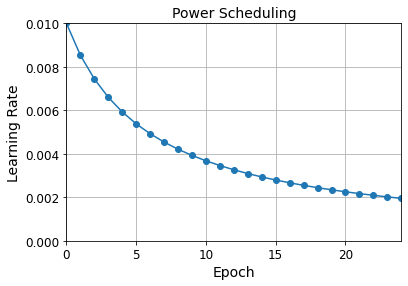

In [30]:
learning_rate = 0.01
decay = 1e-4 
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-") 
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate") 
plt.title("Power Scheduling", fontsize=14) 
plt.grid(True)
#2017250045 정태환
plt.show()

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"]) 
n_epochs = 2

history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))
#2017250045 정태환
model.summary()

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5698 - accuracy: 0.8008 - val_loss: 0.3763 - val_accuracy: 0.8662
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4212 - accuracy: 0.8452 - val_loss: 0.3495 - val_accuracy: 0.8696
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_51 (Dense)            (N